# Import libraries 

In [4]:
import tensorflow as ts
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(10)
from os import listdir
from keras.utils import to_categorical
from skimage.io import imread
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import KFold

In [5]:
# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2

# Load Data

In [6]:
def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img

In [7]:
def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    labels = listdir(dataset_path)  # Geting labels
    X = []
    Y = []
    Z = []
    for i, label in enumerate(labels):
        datas_path = dataset_path + '/' + label
        for data in listdir(datas_path):
            img = get_img(datas_path + '/' + data)
            #plt.matshow(img)
            X.append(img)
            Z.append(img)
            Y.append(i)
        # Create dateset:
    #X = 1 - np.array(X).astype('float32') / 255.
    X = np.array(X).astype('float32')
    Y = np.array(Y).astype('float32')
    X=X/255.0
    #Y = to_categorical(Y, num_class)
    #X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=32)
    return X,Y,Z

In [8]:
X , Y , img  = get_dataset('D:\Sign-Language-Digits-Dataset-master\Dataset')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=32)
#x_train, x_test, y_train, y_test , img = get_dataset('D:\Sign-Language-Digits-Dataset-master\Dataset')

In [9]:
print(x_train.shape)
x_train = x_train.reshape(len(x_train),64*64)
x_test = x_test.reshape(len(x_test),64*64)

(1649, 64, 64, 1)


## First Neural Network architectures

In [8]:
def define_model1():
    model = keras.Sequential([
    keras.layers.Dense(150, input_shape=(64*64,), activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return model

## Second Neural Network architectures

In [9]:
def define_model2():
    model = keras.Sequential([
    keras.layers.Dense(120, input_shape=(64*64,), activation='relu'),
    keras.layers.Dense(160, activation='relu'),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

   
    return model

In [10]:
model1 = define_model1()
model1.fit(x_train, y_train, epochs=50)
model1.evaluate(x_test,y_test)


Epoch 1/50
52/52 [==============================] - 4s 19ms/step - loss: 2.4719 - accuracy: 0.1316
Epoch 2/50
52/52 [==============================] - 1s 18ms/step - loss: 2.1787 - accuracy: 0.2135
Epoch 3/50
52/52 [==============================] - 1s 16ms/step - loss: 1.9315 - accuracy: 0.3263
Epoch 4/50
52/52 [==============================] - 1s 17ms/step - loss: 1.6449 - accuracy: 0.4209
Epoch 5/50
52/52 [==============================] - 1s 17ms/step - loss: 1.5630 - accuracy: 0.4475
Epoch 6/50
52/52 [==============================] - 1s 17ms/step - loss: 1.3420 - accuracy: 0.5470
Epoch 7/50
52/52 [==============================] - 1s 17ms/step - loss: 1.2184 - accuracy: 0.5858
Epoch 8/50
52/52 [==============================] - 1s 17ms/step - loss: 1.1780 - accuracy: 0.5828
Epoch 9/50
52/52 [==============================] - 1s 17ms/step - loss: 1.0533 - accuracy: 0.6598
Epoch 10/50
52/52 [==============================] - 1s 17ms/step - loss: 1.0176 - accuracy: 0.6489
Epoch 11/

[0.7293097972869873, 0.7990314960479736]

In [11]:
model2 = define_model2()
model2.fit(x_train, y_train, epochs=50)
model2.evaluate(x_test,y_test)

Epoch 1/50
52/52 [==============================] - 2s 18ms/step - loss: 2.3706 - accuracy: 0.1164
Epoch 2/50
52/52 [==============================] - 1s 15ms/step - loss: 2.2044 - accuracy: 0.1965
Epoch 3/50
52/52 [==============================] - 1s 16ms/step - loss: 1.9593 - accuracy: 0.3105
Epoch 4/50
52/52 [==============================] - 1s 17ms/step - loss: 1.6621 - accuracy: 0.4021
Epoch 5/50
52/52 [==============================] - 1s 17ms/step - loss: 1.4338 - accuracy: 0.4912
Epoch 6/50
52/52 [==============================] - 1s 17ms/step - loss: 1.2274 - accuracy: 0.5646
Epoch 7/50
52/52 [==============================] - 1s 16ms/step - loss: 1.1389 - accuracy: 0.6167
Epoch 8/50
52/52 [==============================] - 1s 16ms/step - loss: 1.0605 - accuracy: 0.6380
Epoch 9/50
52/52 [==============================] - 1s 17ms/step - loss: 1.0423 - accuracy: 0.6392
Epoch 10/50
52/52 [==============================] - 1s 17ms/step - loss: 0.9535 - accuracy: 0.6737
Epoch 11/

[0.9745751023292542, 0.7457627058029175]

13/13 [==============================] - 0s 5ms/step


Text(69.0, 0.5, 'Truth')

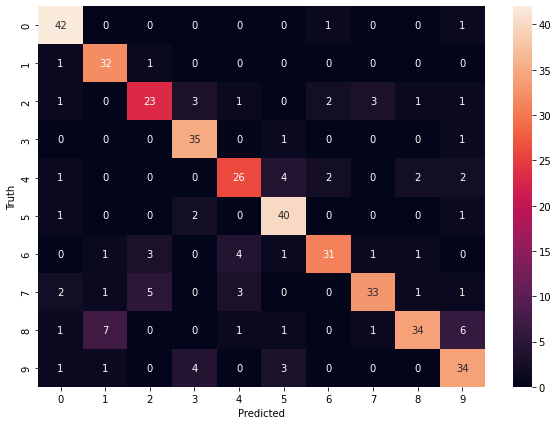

In [12]:
y_predicted1 = model1.predict(x_test)
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
cm1 = ts.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)

plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

13/13 [==============================] - 0s 9ms/step


Text(69.0, 0.5, 'Truth')

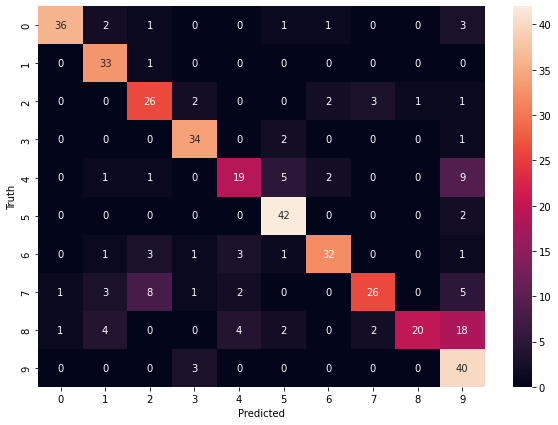

In [13]:
y_predicted2 = model2.predict(x_test)
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
cm2 = ts.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels2)

plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#lo = y_test.shape[0]
#for i in range (lo):
#    print(y_test[i] , "========>" , y_predicted_labels[i])

6
6.0


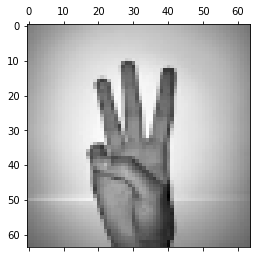

In [14]:
roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,1)
plt.matshow(img,cmap = 'gray')
print(y_predicted_labels1[roro])
print(y_test[roro])

5
5.0


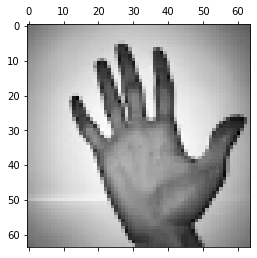

In [15]:
roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,1)
plt.matshow(img,cmap = 'gray')
print(y_predicted_labels2[roro])
print(y_test[roro])

## Cross Over in Neural Network

In [40]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5 ,Model =define_model1()):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        trainX = trainX.reshape(len(trainX),64*64)
        testX = testX.reshape(len(testX),64*64)
        model = Model
        model.fit(trainX, trainY, epochs=50)
        # fit model
        history = model
        # evaluate model
        _, acc = model.evaluate(testX,testY)
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories







In [17]:
scoresModel1 , histories1 = evaluate_model(X,Y,3,model1)


Epoch 1/50
43/43 [==============================] - 1s 18ms/step - loss: 0.4358 - accuracy: 0.8748
Epoch 2/50
43/43 [==============================] - 1s 18ms/step - loss: 0.4185 - accuracy: 0.8668
Epoch 3/50
43/43 [==============================] - 1s 13ms/step - loss: 0.4805 - accuracy: 0.8421
Epoch 4/50
43/43 [==============================] - 1s 14ms/step - loss: 0.4803 - accuracy: 0.8421
Epoch 5/50
43/43 [==============================] - 1s 14ms/step - loss: 0.3343 - accuracy: 0.8981
Epoch 6/50
43/43 [==============================] - 1s 14ms/step - loss: 0.3207 - accuracy: 0.8988
Epoch 7/50
43/43 [==============================] - 1s 15ms/step - loss: 0.3326 - accuracy: 0.8988
Epoch 8/50
43/43 [==============================] - 1s 14ms/step - loss: 0.3642 - accuracy: 0.8894
Epoch 9/50
43/43 [==============================] - 1s 14ms/step - loss: 0.2738 - accuracy: 0.9258
Epoch 10/50
43/43 [==============================] - 1s 14ms/step - loss: 0.3409 - accuracy: 0.8886
Epoch 11/

KeyboardInterrupt: 

In [ ]:
print(scoresModel1)
print(histories1)

[0.8837209343910217, 0.8981077075004578, 0.9665210843086243]
[<keras.engine.sequential.Sequential object at 0x000001B476D95D60>, <keras.engine.sequential.Sequential object at 0x000001B476D95D60>, <keras.engine.sequential.Sequential object at 0x000001B476D95D60>]


In [ ]:
scoresModel2 , histories2 = evaluate_model(x_train,y_train,3,model2)


Epoch 1/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.9017
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.8635
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8526
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.8954
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3827 - accuracy: 0.8644
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8553
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3257 - accuracy: 0.8781
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2552 - accuracy: 0.9145
Epoch 9/50
35/35 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8571
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.8990
Epoch 11/50
35/35 [

35/35 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.9554
Epoch 34/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1155 - accuracy: 0.9645
Epoch 35/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1040 - accuracy: 0.9682
Epoch 36/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1424 - accuracy: 0.9554
Epoch 37/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2929 - accuracy: 0.8899
Epoch 38/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3423 - accuracy: 0.8826
Epoch 39/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8617
Epoch 40/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2384 - accuracy: 0.9126
Epoch 41/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9691
Epoch 42/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.9663
Epoch 43/50
35/35 [===

In [ ]:
print(scoresModel2)
print(histories2)

[0.8472727537155151, 0.921818196773529, 0.9234972596168518]
[<keras.engine.sequential.Sequential object at 0x000001B403700220>, <keras.engine.sequential.Sequential object at 0x000001B403700220>, <keras.engine.sequential.Sequential object at 0x000001B403700220>]


## With CNN

In [ ]:
print(x_train.shape)

(1649, 4096)


In [ ]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(64, 64 ,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(len(x_train),64,64,1)
x_test = x_test.reshape(len(x_test),64,64,1)
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
52/52 [==============================] - 6s 93ms/step - loss: 2.0796 - accuracy: 0.2838
Epoch 2/20
52/52 [==============================] - 6s 114ms/step - loss: 1.0574 - accuracy: 0.6628
Epoch 3/20
52/52 [==============================] - 3s 60ms/step - loss: 0.6709 - accuracy: 0.7908
Epoch 4/20
52/52 [==============================] - 3s 57ms/step - loss: 0.5129 - accuracy: 0.8405
Epoch 5/20
52/52 [==============================] - 3s 54ms/step - loss: 0.4357 - accuracy: 0.8727
Epoch 6/20
52/52 [==============================] - 4s 71ms/step - loss: 0.3606 - accuracy: 0.8872
Epoch 7/20
52/52 [==============================] - 4s 68ms/step - loss: 0.2998 - accuracy: 0.9060
Epoch 8/20
52/52 [==============================] - 3s 62ms/step - loss: 0.2377 - accuracy: 0.9290
Epoch 9/20
52/52 [==============================] - 3s 56ms/step - loss: 0.1991 - accuracy: 0.9375
Epoch 10/20
52/52 [==============================] - 3s 52ms/step - loss: 0.1586 - accuracy: 0.9539
Epoch 11

In [ ]:
cnn.evaluate(x_test,y_test)

13/13 [==============================] - 1s 26ms/step - loss: 0.5786 - accuracy: 0.8741


[0.5786033868789673, 0.8740919828414917]

In [ ]:
y_pred = cnn.predict(x_test)

13/13 [==============================] - 1s 40ms/step


8
8.0


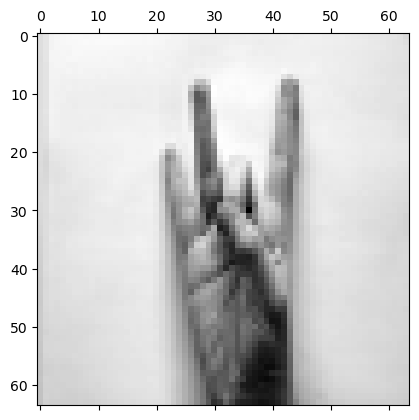

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,1)
plt.matshow(img,cmap = 'gray')
print(y_classes[roro])
print(y_test[roro])

## CNN with RGB

In [18]:
def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size,3))
    return img

In [27]:
def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    labels = listdir(dataset_path)  # Geting labels
    X = []
    Y = []
    Z = []
    for i, label in enumerate(labels):
        datas_path = dataset_path + '/' + label
        for data in listdir(datas_path):
            img = get_img(datas_path + '/' + data)
            #plt.matshow(img)
            X.append(img)
            Z.append(img)
            Y.append(i)
        # Create dateset:
    #X = 1 - np.array(X).astype('float32') / 255.
    X = np.array(X).astype('float32')
    Y = np.array(Y).astype('float32')
    m=X.mean()
    #for i in range(X.shape[0])
    #Y = to_categorical(Y, num_class)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=32)
    return X, X_test, Y, Y_test,Z, m

In [84]:
x_train, x_test, y_train, y_test , img, m = get_dataset('D:\Sign-Language-Digits-Dataset-master\Dataset')

In [82]:
print(x_train.shape)
#print(x_train[0])
print("==================================")
for i  in range(x_train.shape[0]):
    for j in range(x_train.shape[1]):
        x_train[i][j][k] = (x_train[i][j][k] - m) /255.0
for i  in range(x_test.shape[0]):
    for j in range(x_test.shape[1]): 
        x_test[i][j][k] = (x_test[i][j][k] - m) /255.0
#print(x_train[0])


(1649, 64, 64, 3)


In [30]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(64, 64 ,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
52/52 [==============================] - 7s 108ms/step - loss: 2.3034 - accuracy: 0.0910
Epoch 2/20
52/52 [==============================] - 5s 104ms/step - loss: 2.3027 - accuracy: 0.0855
Epoch 3/20
52/52 [==============================] - 5s 103ms/step - loss: 2.3026 - accuracy: 0.1140
Epoch 4/20
52/52 [==============================] - 5s 103ms/step - loss: 2.2892 - accuracy: 0.1352
Epoch 5/20
52/52 [==============================] - 6s 105ms/step - loss: 2.1584 - accuracy: 0.2347
Epoch 6/20
52/52 [==============================] - 6s 107ms/step - loss: 1.7928 - accuracy: 0.4002
Epoch 7/20
52/52 [==============================] - 6s 114ms/step - loss: 1.3664 - accuracy: 0.5597
Epoch 8/20
52/52 [==============================] - 6s 108ms/step - loss: 1.1221 - accuracy: 0.6380
Epoch 9/20
52/52 [==============================] - 5s 105ms/step - loss: 0.9681 - accuracy: 0.6913
Epoch 10/20
52/52 [==============================] - 6s 107ms/step - loss: 0.9102 - accuracy: 0.6956

In [35]:
cnn.evaluate(x_test,y_test)

13/13 [==============================] - 0s 23ms/step - loss: 0.7864 - accuracy: 0.7627


[0.7863529324531555, 0.7627118825912476]

In [36]:
y_pred = cnn.predict(x_test)

13/13 [==============================] - 0s 25ms/step


4
4.0


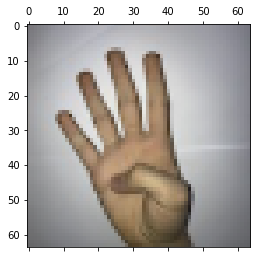

In [85]:
y_classes = [np.argmax(element) for element in y_pred]
roro = random_state=random.randint(0,len(x_test) - 1)
img = x_test[roro].reshape(64,64,3)
plt.matshow(img,cmap = 'gray')
print(y_classes[roro])
print(y_test[roro])

In [86]:
def define_model4():
    cn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(64, 64 ,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

    cn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['fscore'])

   
    return cn

# evaluate a model using k-fold cross-validation
def evaluate_model_CNN(dataX, dataY, n_folds=5 ,Model = define_model4()):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        
        #trainX = trainX.reshape(len(trainX),64 ,64 , 3)
        #testX = testX.reshape(len(testX),64,64 , 3)
        model = Model
        model.fit(trainX, trainY, epochs=10)
        # fit model
        history = model
        # evaluate model
        _, acc = model.evaluate(testX,testY)
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

scoresModel3 , histories3 = evaluate_model_CNN(x_train,y_train,3 )


Epoch 1/10
35/35 [==============================] - 5s 107ms/step - loss: 2.2949 - accuracy: 0.1692
Epoch 2/10
35/35 [==============================] - 4s 104ms/step - loss: 1.7275 - accuracy: 0.4686
Epoch 3/10
35/35 [==============================] - 4s 105ms/step - loss: 0.9808 - accuracy: 0.6724
Epoch 4/10
35/35 [==============================] - 4s 106ms/step - loss: 0.6538 - accuracy: 0.7780
Epoch 5/10
35/35 [==============================] - 4s 106ms/step - loss: 0.4548 - accuracy: 0.8517
Epoch 6/10
35/35 [==============================] - 4s 107ms/step - loss: 0.3878 - accuracy: 0.8735
Epoch 7/10
35/35 [==============================] - 4s 110ms/step - loss: 0.2973 - accuracy: 0.8944
Epoch 8/10
35/35 [==============================] - 4s 108ms/step - loss: 0.2367 - accuracy: 0.9272
Epoch 9/10
35/35 [==============================] - 4s 109ms/step - loss: 0.1732 - accuracy: 0.9472
Epoch 10/10
18/18 [==============================] - 1s 20ms/step - loss: 0.6496 - accuracy: 0.8327


In [54]:
cnn.summary()

Training on Fold:  1
Epoch 1/10
11/11 [==============================] - ETA: 0s - loss: 2.2962 - accuracy: 0.1386
Epoch 1: val_loss improved from inf to 2.29971, saving model to fas_mnist_1.h5
11/11 [==============================] - 5s 412ms/step - loss: 2.2962 - accuracy: 0.1386 - val_loss: 2.2997 - val_accuracy: 0.0671
Epoch 2/10
11/11 [==============================] - ETA: 0s - loss: 2.2940 - accuracy: 0.1019
Epoch 2: val_loss did not improve from 2.29971
11/11 [==============================] - 4s 349ms/step - loss: 2.2940 - accuracy: 0.1019 - val_loss: 2.3002 - val_accuracy: 0.0671
Epoch 3/10
11/11 [==============================] - ETA: 0s - loss: 2.2959 - accuracy: 0.1071
Epoch 3: val_loss did not improve from 2.29971
11/11 [==============================] - 4s 350ms/step - loss: 2.2959 - accuracy: 0.1071 - val_loss: 2.3099 - val_accuracy: 0.1342
Epoch 4/10
11/11 [==============================] - ETA: 0s - loss: 2.2939 - accuracy: 0.1835
Epoch 4: val_loss improved from 2.299

In [87]:
print(scoresModel3)
print(histories3)

[0.8327272534370422, 0.9690909385681152, 0.9908925294876099]
[<keras.engine.sequential.Sequential object at 0x00000174992270A0>, <keras.engine.sequential.Sequential object at 0x00000174992270A0>, <keras.engine.sequential.Sequential object at 0x00000174992270A0>]


In [7]:

#X , Y , img  = get_dataset('D:\Sign-Language-Digits-Dataset-master\Dataset')
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=32)
x_train = x_train.reshape(len(x_train),64*64)
x_test = x_test.reshape(len(x_test),64*64)
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model5=GridSearchCV(svc,param_grid)
model5.fit(x_train,y_train)
y_pred5=model.predict(x_test)
print("The predicted Data is :")
print(y_pred5)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred5,y_test)*100}% accurate")

KeyboardInterrupt: 

In [11]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

ValueError: Found input variables with inconsistent numbers of samples: [4096, 1649]